In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# For N= 10000
n_cluster = [50,150,250]
t1 = [451.104852915, 1713.10641217,3078.98646784,4793.72459292,6021.21900702]
t24=[ 445.610488892,1461.39281893,2833.5353601,3989.6359961,6001.32930088]
t48 = [ 447.018620968,1608.32320189,3090.17691207,4106.21568799,5851.72110486]
t72 = [507.764747143,1738.19417596,3120.0430789, 4757.04495215,6427.62422395]
t96=[457.056144953,1432.56956506,2683.95310998,4382.36116385,5813.01377392]
t120 = [537.610777855,1698.0235889,3189.95673394,4452.95485401,6110.94281197]
t144=[448.538481951,1760.8822751,2761.18662906,4249.16388702,5645.10961413]
# t168 = [442.963862181, 1690.81970501, 2581.13141584, 3925.72008491]

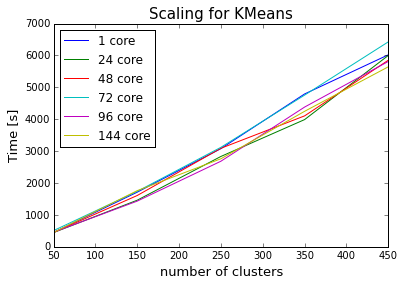

In [11]:
# For N= 10000
n_cluster = [50,150,250,350,450]
# for t in [t1,t24,t48,t72,t96,t120,t144]:#,t168]:
# plt.plot(n_cluster,t,'o')
plt.plot(n_cluster,t1,label="1 core")
plt.plot(n_cluster,t24,label="24 core")
plt.plot(n_cluster,t48,label="48 core")
plt.plot(n_cluster,t72,label="72 core")
plt.plot(n_cluster,t96,label="96 core")
# plt.plot(n_cluster,t120,label="120")
plt.plot(n_cluster,t144,label="144 core")
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Time [s]",fontsize=13)
plt.title("Scaling for KMeans",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

There are almost no speedup if I use more cores by changing n_jobs

In [17]:
np.arange(50,550,100)

array([ 50, 150, 250, 350, 450])

In [12]:
np.arange(550,1000,100)

array([550, 650, 750, 850, 950])

In [15]:
cd ..

/global/project/projectdirs/astro250/doris/halo/halo_find


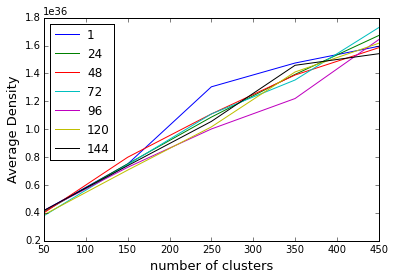

In [28]:
import os
import glob
for i in glob.glob("4test*"): 
#     os.chdir(i)
#     print i
    avrg_densities=[]
    for n in np.arange(50,550,100):
        avrg_densities.append(mean(np.loadtxt("{0}/density{1}.txt".format(i,n))))
    plt.plot(np.arange(50,550,100),avrg_densities,label=i[5:])
#     print mean(densities)
#     os.chdir("../")
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Average Density",fontsize=13)
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

Okay since njob doesn't even help with speedup ,then there's no concern to just switch to minibatch kmeans (which doesn't have njob, but it samples with smaller random minibatches, note that SGD is aggressive and affect clustering result )